In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list. Unzip the lat_lngs
coordinates = list(lat_lngs)
print(coordinates)

[(-45.861010129200324, -60.92321622828567), (55.55723053037465, 8.769983928852724), (87.69794265321391, -161.41018349925628), (-9.453593041133274, -43.33217444684507), (-12.831808124902437, 35.634137200530176), (-13.901625733346336, -135.77648696747363), (-86.79649042524242, -163.98681044992546), (-81.12568633211633, -136.78172960470079), (-72.99035752235599, -179.9146468739943), (-86.77182079668249, -55.69143402393101), (-85.86514659512389, 147.20015536897114), (35.988161753090694, -141.9424960109431), (51.18788050304485, -162.10551038549582), (78.27617739554461, 28.63227917593437), (65.12366574085942, -71.54094048269904), (-19.625335096829275, 10.080880496096654), (11.411870740697864, 177.33498888766337), (54.60371113886265, 33.26867553473835), (-77.57546196130842, -54.907472714037425), (-70.49198868569594, 20.49681317004928), (-80.9558078544329, 159.12436319899467), (-20.55349048137525, 47.16332128127516), (1.5733936150637788, 136.1806026218465), (60.957520783643304, 65.521752805226

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
cities

['rawson',
 'bramming',
 'barrow',
 'sao raimundo nonato',
 'lichinga',
 'atuona',
 'mataura',
 'rikitea',
 'vaini',
 'ushuaia',
 'hobart',
 'fortuna',
 'bethel',
 'mehamn',
 'iqaluit',
 'opuwo',
 'butaritari',
 'yelnya',
 'bredasdorp',
 'bluff',
 'ambositra',
 'biak',
 'uray',
 'clyde river',
 'jamestown',
 'port alfred',
 'avarua',
 'geraldton',
 'khatanga',
 'emilio carranza',
 'narsaq',
 'lebu',
 'hilo',
 'carnarvon',
 'mahebourg',
 'umzimvubu',
 'shunyi',
 'pyapon',
 'nanortalik',
 'itoman',
 'upernavik',
 'port lincoln',
 'meyungs',
 'thompson',
 'mar del plata',
 'chuy',
 'angoche',
 'porto velho',
 'kruisfontein',
 'kodiak',
 'honiara',
 'new norfolk',
 'vallenar',
 'yulara',
 'nizhneyansk',
 'dorado',
 'puerto ayora',
 'yerbogachen',
 'cape town',
 'sitka',
 'port hardy',
 'mount gambier',
 'ust-kuyga',
 'porto novo',
 'hutchinson',
 'dikson',
 'toungoo',
 'severo-kurilsk',
 'airai',
 'hermanus',
 'diebougou',
 'cayenne',
 'hualmay',
 'manzanillo',
 'gura teghii',
 'komsomolsk

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=026a43e4fd2b7d6063a8fd638bd71a30


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rawson
Processing Record 2 of Set 1 | bramming
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | sao raimundo nonato
Processing Record 5 of Set 1 | lichinga
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | mehamn
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | opuwo
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | yelnya
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | ambositra
Processing Record 22 of Set 1 | biak
Processing Record 23 of Set 1 | uray
Processing Record 24 of Se

Processing Record 41 of Set 4 | huarmey
Processing Record 42 of Set 4 | port blair
Processing Record 43 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 44 of Set 4 | parras
City not found. Skipping...
Processing Record 45 of Set 4 | chegdomyn
Processing Record 46 of Set 4 | great bend
Processing Record 47 of Set 4 | kilindoni
Processing Record 48 of Set 4 | jinxiang
Processing Record 49 of Set 4 | bertoua
Processing Record 50 of Set 4 | alyangula
Processing Record 1 of Set 5 | aquiraz
Processing Record 2 of Set 5 | quatre cocos
Processing Record 3 of Set 5 | teberda
Processing Record 4 of Set 5 | xuddur
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | kapaa
Processing Record 8 of Set 5 | kavieng
Processing Record 9 of Set 5 | oktyabrskoye
Processing Record 10 of Set 5 | ashland
Processing Record 11 of Set 5 | letterkenny
Processing Record 12 of Set 5 | ishigaki
Processi

Processing Record 30 of Set 8 | malwan
City not found. Skipping...
Processing Record 31 of Set 8 | mahajanga
Processing Record 32 of Set 8 | evensk
Processing Record 33 of Set 8 | argentan
Processing Record 34 of Set 8 | koygorodok
Processing Record 35 of Set 8 | torbay
Processing Record 36 of Set 8 | ponta do sol
Processing Record 37 of Set 8 | faya
Processing Record 38 of Set 8 | alofi
Processing Record 39 of Set 8 | kachikau
City not found. Skipping...
Processing Record 40 of Set 8 | sao filipe
Processing Record 41 of Set 8 | sechura
Processing Record 42 of Set 8 | buzdyak
Processing Record 43 of Set 8 | hagi
Processing Record 44 of Set 8 | katherine
Processing Record 45 of Set 8 | kozhva
Processing Record 46 of Set 8 | araouane
Processing Record 47 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 48 of Set 8 | aryanah
Processing Record 49 of Set 8 | esperance
Processing Record 50 of Set 8 | mayor pablo lagerenza
Processing Record 1 of Set 9 | babu
Processing Record 2 of Set 9

Processing Record 13 of Set 12 | socorro
Processing Record 14 of Set 12 | nyimba
Processing Record 15 of Set 12 | umm lajj
Processing Record 16 of Set 12 | french harbor
Processing Record 17 of Set 12 | rudnichnyy
Processing Record 18 of Set 12 | nouakchott
Processing Record 19 of Set 12 | nowy dwor mazowiecki
Processing Record 20 of Set 12 | caohe
Processing Record 21 of Set 12 | kupang
Processing Record 22 of Set 12 | saint-raymond
Processing Record 23 of Set 12 | baiyin
Processing Record 24 of Set 12 | hammerfest
Processing Record 25 of Set 12 | la ronge
Processing Record 26 of Set 12 | seminole
Processing Record 27 of Set 12 | topeka
Processing Record 28 of Set 12 | portland
Processing Record 29 of Set 12 | quelimane
Processing Record 30 of Set 12 | adeje
Processing Record 31 of Set 12 | tuatapere
Processing Record 32 of Set 12 | conceicao do araguaia
Processing Record 33 of Set 12 | tharad
Processing Record 34 of Set 12 | scarborough
Processing Record 35 of Set 12 | haimen
Process

In [91]:
len(city_data)

551

In [93]:
# Create a DataFrame of City Weather Data
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rawson,-43.30,-65.10,46.83,54,0,5.14,AR,2020-05-06 11:23:29
1,Bramming,55.47,8.70,53.60,62,33,16.11,DK,2020-05-06 11:22:37
2,Barrow,71.29,-156.79,10.40,92,90,12.75,US,2020-05-06 11:20:14
3,Sao Raimundo Nonato,-9.02,-42.70,76.71,73,49,9.15,BR,2020-05-06 11:23:43
4,Lichinga,-13.31,35.24,73.40,53,75,5.82,MZ,2020-05-06 11:23:43
5,Atuona,-9.80,-139.03,80.49,76,10,16.71,PF,2020-05-06 11:23:44
6,Mataura,-46.19,168.86,48.38,76,100,5.30,NZ,2020-05-06 11:23:44
7,Rikitea,-23.12,-134.97,73.58,63,83,11.92,PF,2020-05-06 11:23:04
8,Vaini,-21.20,-175.20,77.00,94,75,8.05,TO,2020-05-06 11:23:44
9,Ushuaia,-54.80,-68.30,35.60,64,100,3.74,AR,2020-05-06 11:22:57


In [94]:
# Reorder the columns of DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rawson,AR,2020-05-06 11:23:29,-43.30,-65.10,46.83,54,0,5.14
1,Bramming,DK,2020-05-06 11:22:37,55.47,8.70,53.60,62,33,16.11
2,Barrow,US,2020-05-06 11:20:14,71.29,-156.79,10.40,92,90,12.75
3,Sao Raimundo Nonato,BR,2020-05-06 11:23:43,-9.02,-42.70,76.71,73,49,9.15
4,Lichinga,MZ,2020-05-06 11:23:43,-13.31,35.24,73.40,53,75,5.82
5,Atuona,PF,2020-05-06 11:23:44,-9.80,-139.03,80.49,76,10,16.71
6,Mataura,NZ,2020-05-06 11:23:44,-46.19,168.86,48.38,76,100,5.30
7,Rikitea,PF,2020-05-06 11:23:04,-23.12,-134.97,73.58,63,83,11.92
8,Vaini,TO,2020-05-06 11:23:44,-21.20,-175.20,77.00,94,75,8.05
9,Ushuaia,AR,2020-05-06 11:22:57,-54.80,-68.30,35.60,64,100,3.74


In [95]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [96]:
# Adding a label to the index
city_data_df.index.name
'Index Title'
city_data_df.index.name = 'City_ID'
city_data_df.index.name
'City_ID'
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Rawson,AR,2020-05-06 11:23:29,-43.30,-65.10,46.83,54,0,5.14
1,Bramming,DK,2020-05-06 11:22:37,55.47,8.70,53.60,62,33,16.11
2,Barrow,US,2020-05-06 11:20:14,71.29,-156.79,10.40,92,90,12.75
3,Sao Raimundo Nonato,BR,2020-05-06 11:23:43,-9.02,-42.70,76.71,73,49,9.15
4,Lichinga,MZ,2020-05-06 11:23:43,-13.31,35.24,73.40,53,75,5.82


In [97]:
city_data_df = city_data_df.reset_index()
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Rawson,AR,2020-05-06 11:23:29,-43.30,-65.10,46.83,54,0,5.14
1,1,Bramming,DK,2020-05-06 11:22:37,55.47,8.70,53.60,62,33,16.11
2,2,Barrow,US,2020-05-06 11:20:14,71.29,-156.79,10.40,92,90,12.75
3,3,Sao Raimundo Nonato,BR,2020-05-06 11:23:43,-9.02,-42.70,76.71,73,49,9.15
4,4,Lichinga,MZ,2020-05-06 11:23:43,-13.31,35.24,73.40,53,75,5.82
...,...,...,...,...,...,...,...,...,...,...
546,546,Husavik,IS,2020-05-06 11:25:07,66.04,-17.34,48.20,45,75,10.29
547,547,Walvis Bay,NA,2020-05-06 11:25:07,-22.96,14.51,102.20,10,0,26.40
548,548,Praya,CV,2020-05-06 11:25:07,14.92,-23.51,80.60,57,20,17.22
549,549,Saint George,US,2020-05-06 11:25:07,37.10,-113.58,60.80,26,1,2.48


In [98]:
# Plot Latitude vs. Temperature.  Get data for plotting.
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [99]:
# Import the time module.
import time

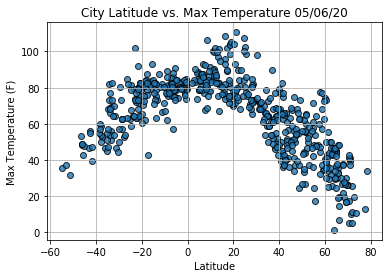

In [100]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

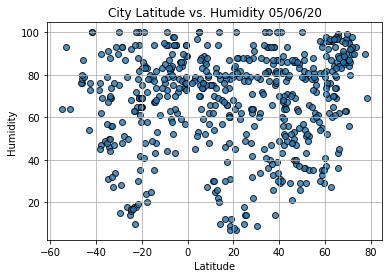

In [101]:
# Plot Latitude vs. Humidity
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

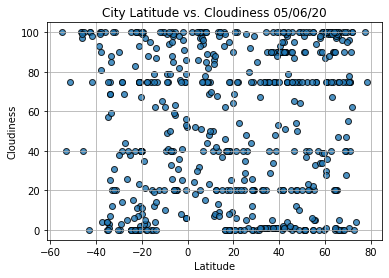

In [102]:
# Plot Latitude vs. Cloudiness
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

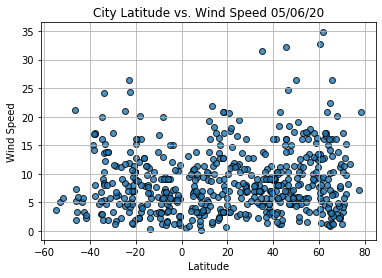

In [103]:
# Plot Latitude vs. Wind Speed
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [123]:
# Use Linear Regression to Find the Relationship Between Variables
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [150]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"The r-value is is: {r_value:.4f}")
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [151]:
# Create the Hemisphere DataFrames from the city_data_df
index13 = city_data_df.loc[13]
print(index13)

City_ID                        13
City                       Mehamn
Country                        NO
Date          2020-05-06 11:23:45
Lat                         71.04
Lng                         27.85
Max Temp                     39.2
Humidity                       80
Cloudiness                     75
Wind Speed                    4.7
Name: 13, dtype: object


In [152]:
# Filtering a DataFrame based on a value of a row
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
546     True
547    False
548     True
549     True
550    False
Name: Lat, Length: 551, dtype: bool

In [153]:
# latitudes greater than or equal to 0. Northern and Southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
print(northern_hemi_df.head())
print(southern_hemi_df.head())

    City_ID      City Country                 Date    Lat     Lng  Max Temp  \
1         1  Bramming      DK  2020-05-06 11:22:37  55.47    8.70     53.60   
2         2    Barrow      US  2020-05-06 11:20:14  71.29 -156.79     10.40   
11       11   Fortuna      US  2020-05-06 11:23:44  40.60 -124.16     50.00   
12       12    Bethel      US  2020-05-06 11:23:44  41.37  -73.41     44.01   
13       13    Mehamn      NO  2020-05-06 11:23:45  71.04   27.85     39.20   

    Humidity  Cloudiness  Wind Speed  
1         62          33       16.11  
2         92          90       12.75  
11       100          90        2.57  
12        60          90        6.93  
13        80          75        4.70  
   City_ID                 City Country                 Date    Lat     Lng  \
0        0               Rawson      AR  2020-05-06 11:23:29 -43.30  -65.10   
3        3  Sao Raimundo Nonato      BR  2020-05-06 11:23:43  -9.02  -42.70   
4        4             Lichinga      MZ  2020-05-06 11

The r-value is is: -0.8431


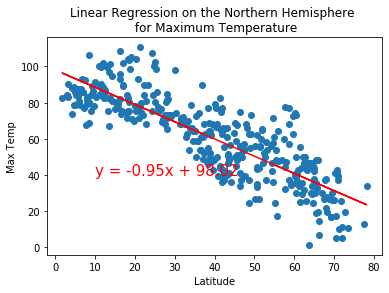

In [154]:
# Perform Linear Regression on the Maximum Temperature for the 
# Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,40))

The r-value is is: 0.7276


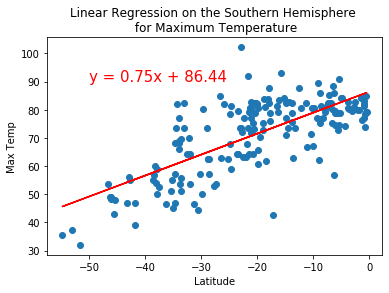

In [155]:
# Perform Linear Regression on the Maximum Temperature for the 
# Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))


The r-value is is: 0.1887


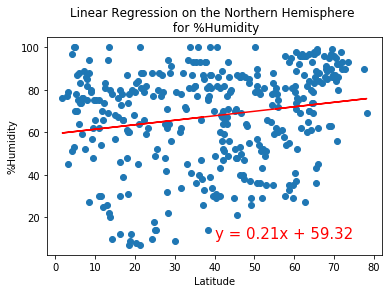

In [156]:
# Find the Correlation Between Latitude and Percent Humidity
# Perform Linear Regression on Percent Humidity for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for %Humidity', 
                       '%Humidity',(40,10))

The r-value is is: 0.1958


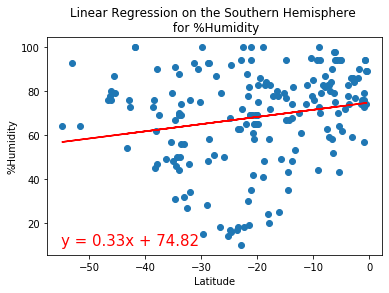

In [157]:
# Perform Linear Regression on Percent Humidity for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for %Humidity', 
                       '%Humidity',(-55,10))

The r-value is is: 0.0765


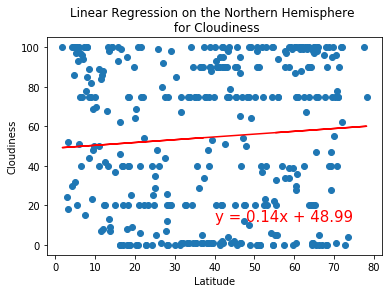

In [160]:
# Find the Correlation Between Latitude and Cloudiness
# Perform Linear Regression on Cloudiness for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 
                       'Cloudiness',(40,12))

The r-value is is: -0.0283


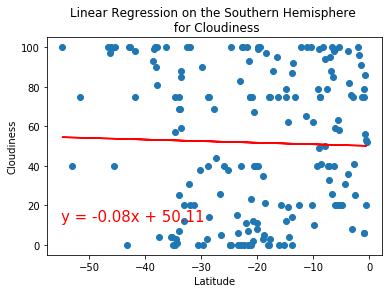

In [169]:
# Find the Correlation Between Latitude and Cloudiness
# Perform Linear Regression on Cloudiness for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness', 
                       'Cloudiness',(-55,12))

The r-value is is: 0.1248


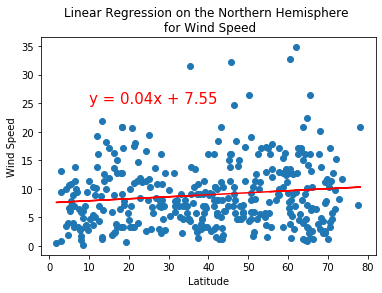

In [165]:
# Find the Correlation Between Latitude and Wind Speed
# Perform Linear Regression on Wind Speed for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(10,25))

The r-value is is: -0.1467


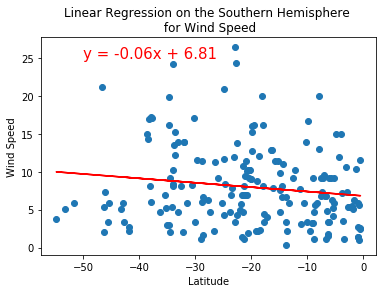

In [170]:
# Perform Linear Regression on Wind Speed for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,25))